# Laboratory #2_2 : Corner detection and ORB

At the end of this laboratory, you would get familiarized with

*   Corner Detection using FAST and Harris Corners
*   ORB feature detectors and descriptors

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import color, data, feature, filters, io, transform 
from skimage import color
from skimage import io
from skimage.color import rgb2gray

from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

from skimage.feature import corner_fast, corner_peaks, corner_harris


# Corner Detection

### Exercise: #1

*    Detect the corners in the image starbucks4.jpg. Use corner_fast to extract FAST corners for the given image and corner_peaks to find corners in the corner measure response image.
*   Show the original image, fast corners, peaks overlayed on the original image using matplotlib subplot.



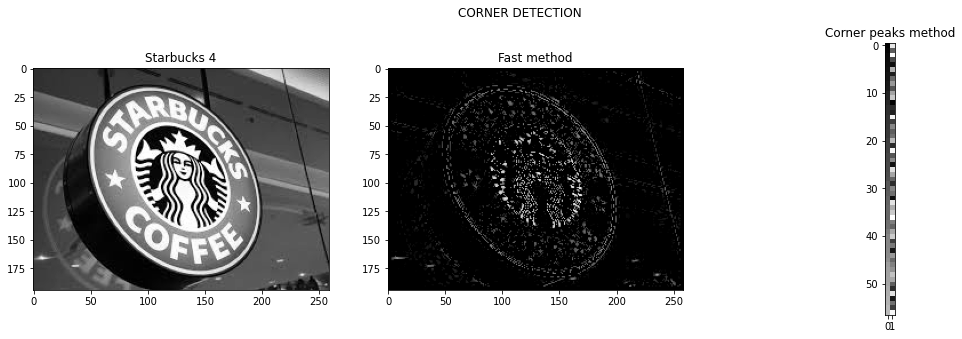

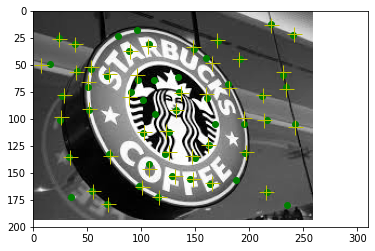

In [3]:
# solution

#Import the image starbucks4
image = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab5Detection/images/starbucks/starbucks4.jpg')
starbucks4 = rgb2gray(image)


#Apply the methods Fast and corner to detect the corners
fast = corner_fast(starbucks4, n=12, threshold=0.01)
corner= corner_peaks(fast, min_distance=10)
#Extract the coords of the peaks
coords_peak = corner_subpix(starbucks4, corner, window_size=13)

#We procced to plot our results

fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(18,5))
fig.suptitle('CORNER DETECTION')

ax1.set_title('Starbucks 4')
ax1.imshow(starbucks4, cmap='gray')
ax2.set_title('Fast method')
ax2.imshow(fast, cmap='gray')
ax3.set_title('Corner peaks method')
ax3.imshow(corner,cmap='gray')

#plt.show()


fig, ax = plt.subplots()
ax.imshow(starbucks4, cmap=plt.cm.gray)
ax.plot(corner[:, 1], corner[:, 0], color='green', marker='o',
        linestyle='None', markersize=6)
ax.plot(coords_peak[:, 1], coords_peak[:, 0], '+y', markersize=15)
ax.axis((0, 310, 200, 0))
plt.show()




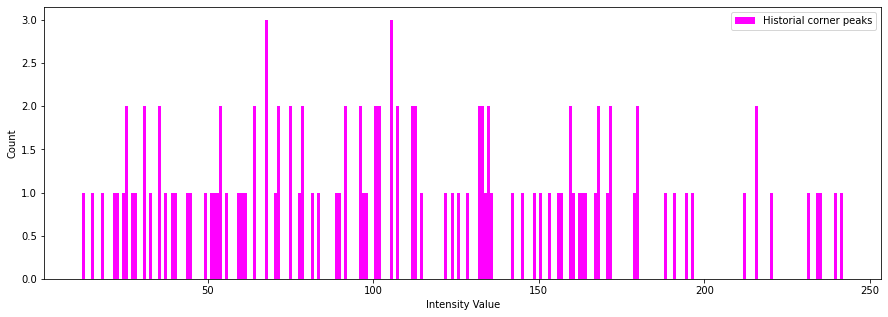

In [4]:
import matplotlib.pyplot as plt
histogram = plt.figure(figsize=(15, 5))
histogram = plt.hist(corner.ravel(), bins = 250, color='magenta')
histogram= plt.xlabel('Intensity Value')
histogram = plt.ylabel('Count')
histogram = plt.legend(['Historial corner peaks'])

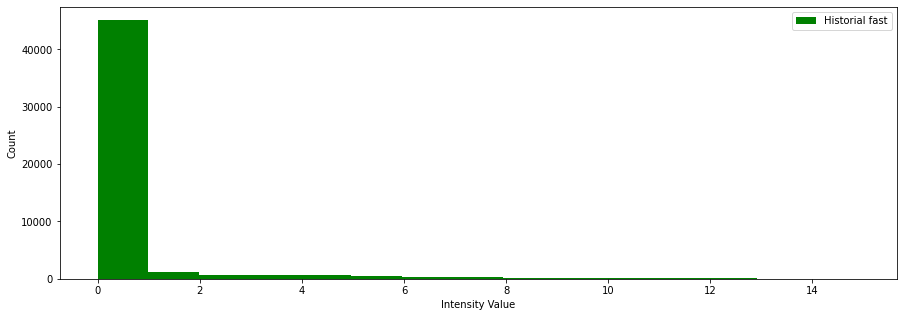

In [5]:
histogramFast = plt.figure(figsize=(15, 5))
histogramFast = plt.hist(fast.ravel(), bins = 15, color='green')
histogramFast= plt.xlabel('Intensity Value')
histogramFast = plt.ylabel('Count')
histogramFast = plt.legend(['Historial fast'])

*   Analyze and discuss the effect of changing **'threshold'** in the corner_fast function.

**Solution**

Threshold used in deciding whether the pixels on the circle are brighter, darker or similar w.r.t. the test pixel. Decrease the threshold when more corners are desired and vice-versa.

*   Repeat the exercise by replacing FAST corners with Harris corners.

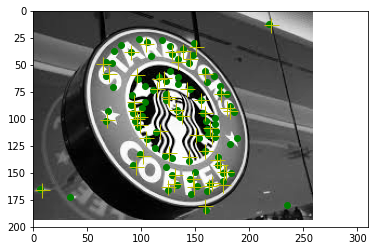

In [6]:
# solution
peaks_harris = corner_peaks(corner_harris(starbucks4), min_distance=5, threshold_rel=0.02)
coords_subpix = corner_subpix(starbucks4, peaks_harris, window_size=13)

fig, ax = plt.subplots()
ax.imshow(starbucks4, cmap=plt.cm.gray)
ax.plot(peaks_harris[:, 1], peaks_harris[:, 0], color='green', marker='o',
        linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+y', markersize=15)
ax.axis((0, 310, 200, 0))
plt.show()

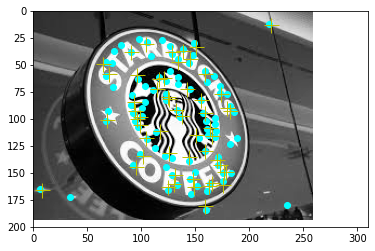

In [7]:

# Ellipse
img=starbucks4
coords = corner_peaks(corner_harris(img), min_distance=5, threshold_rel=0.02)
coords_subpix = corner_subpix(img, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+y', markersize=15)
ax.axis((0, 310, 200, 0))
plt.show()

*   Do you find difference between both the techniques? If so, why and what difference do you observe?

**Solution**

*When we give a lower value the distance between first and second descriptor is quite near and vice verse if the value is high *

...

# ORB feature detector and binary descriptor

### Exercise #0: Compute ORB descriptors and find descriptors match

*   Load 'astronaut' image from data module.
*   Convert the image to grayscale.
*   Create a copy of the image and rotate it by 180&deg; 



In [8]:
img1 = color.rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)

*   Create an ORB feature detector with default parameters. *Hint: ORB feature detector is available in skimage.feature module.*



In [9]:
descriptor_extractor = feature.ORB(n_keypoints=100)

*   Extract the keypoints and descriptors using detect_and_extract function for both the images

In [10]:
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

*   Descriptors can be matched using match_descriptors function available in skimage.feature module
*   The matches can be plotted using the plot_matches function available in skimage.feature module

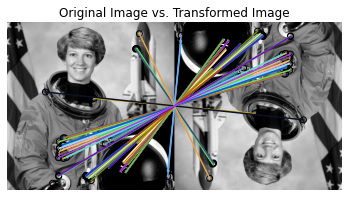

In [ ]:
matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
feature.plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Original Image vs. Transformed Image")
plt.show()

### Exercise: #1

*   Analyze and discuss the effect of changing the parameter **'max_ratio'** in the match_descriptors function.

**Solution**

*The Maximum ratio of distances between first and second closest descriptor in the second set of descriptors.
This threshold is useful to filter ambiguous matches between the two descriptor sets.*

...

*   What do you infer from **'harris_k'**, **'n_scales'**, **'fast_n'**, **'fast_threshold'** parameters in ORB function?

**Solution**

*harris_k is the sensitivity factor to separate corners from edges, typically in range [0, 0.2]. *

...

### Exercise: #2
*   Using the above example, create a function get_ORB, that takes two images as parameters and returns the keypoints of both images and descriptor matches

In [11]:
# solution
from skimage.transform import resize
def get_ORB(img1,img2,keyPoints):


  img1 = resize(img1, (256, 256))
  img2 = resize(img2, (256, 256))

  img1 = color.rgb2gray(img1)
  img2 = color.rgb2gray(img2)

  descriptor_extractor = feature.ORB(n_keypoints=keyPoints)
  descriptor_extractor.detect_and_extract(img1)

  keypoints1 = descriptor_extractor.keypoints
  descriptors1 = descriptor_extractor.descriptors

  descriptor_extractor.detect_and_extract(img2)
  keypoints2 = descriptor_extractor.keypoints
  descriptors2 = descriptor_extractor.descriptors

  matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
  plt.figure(figsize=(10,10))
  feature.plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)

  plt.axis('off')
  
  plt.title("Original Image vs. Transformed Image")
  plt.show()

*   Using the above function, detect the correspondences between the model image 'starbucks.jpg' with the scene image 'starbucks4.jpg'
*   Plot the matches between the two images.

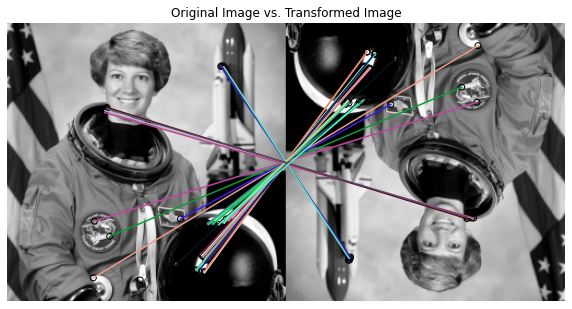

In [12]:
# solution
starbucks = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab5Detection/images/starbucks/starbucks.jpg')
starbucks4 = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab5Detection/images/starbucks/starbucks4.jpg')

get_ORB(img1,img2,40)

### Exercise: #3

*   Using "starbucks.jpg" image as a model, show its matches to all Starbucks images. 
*   Show the number of the matches for the pair as title for each plot.

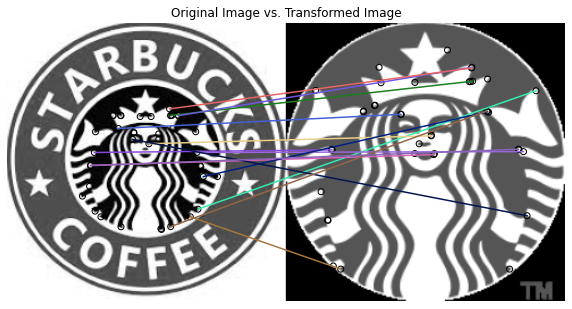

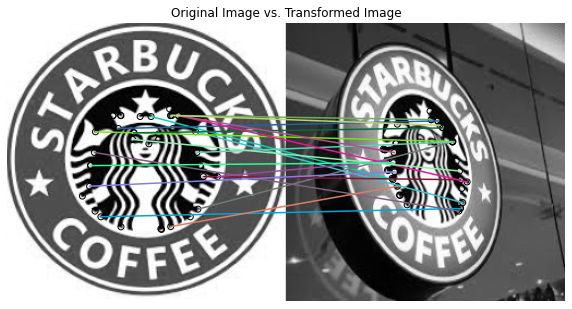

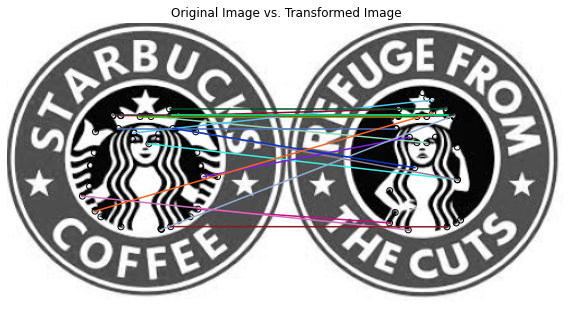

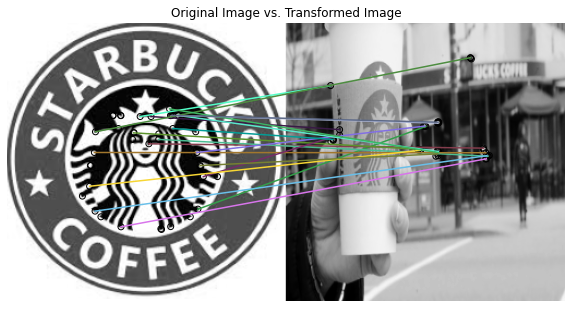

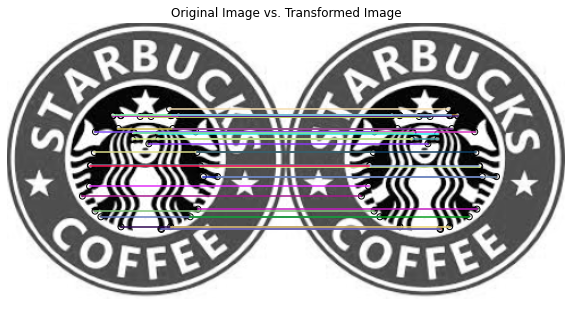

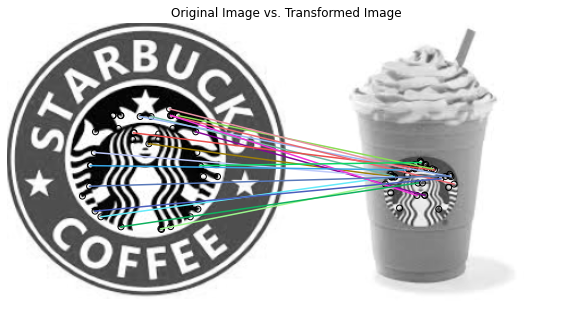

In [13]:
starbucks_dataset = io.imread_collection('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/LAB521/images/starbucks/*')
model = starbucks_dataset[4]

for i in range(0,len(starbucks_dataset)):
  
  get_ORB(model,starbucks_dataset[i],40)
  i = i+1
  

*   Comment on the performance of the algorithm with respect to each image. When do you think the algorithm works better?

**Solution**

*The image have better results when its images are very similar, but if one of them have variation in angle in different dimensions or is very far in the z dimension, that influence a lot, with that the algorithm only made match in some pixels where the contrast is similar than the original corner in the model image. *

...

### Exercise: #4

*   Repeate **Exercise #2**, by changing the orientation of the model image by rotating it and comparing it with its original version.
*   Create 8 orientations of the model image by rotating the image by 45&deg; (0, 45, 90, 135, 180, 225, 270, 315). *Hint: You can use the rotate() function from skimage.transform.*

In [15]:
# solution
model = starbucks_dataset[4]
angle = [0,45,90,135,180,225,270,315]
img2 = starbucks_dataset[4]

for i in range(0,len(angle)):
  img2 = transform.rotate(img2, angle[i])
  get_ORB(model,img2,40)
  i = i+1
  




Output hidden; open in https://colab.research.google.com to view.

*   What do you observe with respect to the change in orientations?

**Solution**

*If we have the same images and at the same time we have goods results and then we rotate the angle of one of them, we can aprecciate than doesn't affect nothing.*

...

### Exercise: #5

*   Repeat **Exercise #3** using Coco-cola images using cocacola_logo.png as the model image.
*   Does the same parameters used for Starbucks images work in this case? Or was it necessary to modify the ORB parameters?

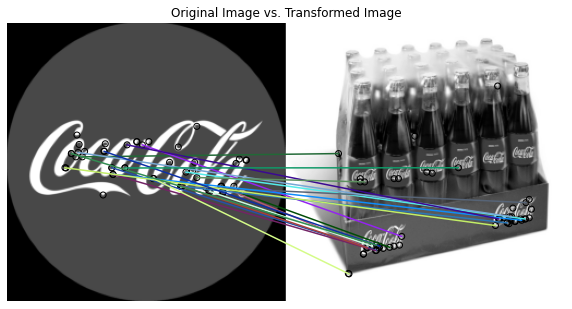

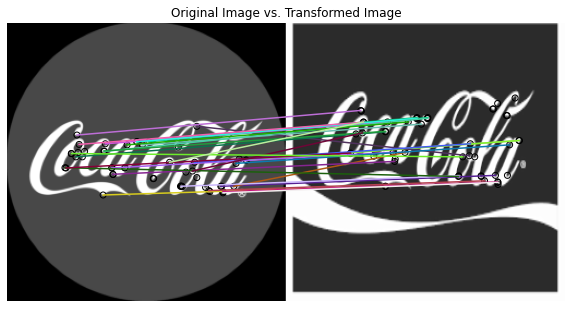

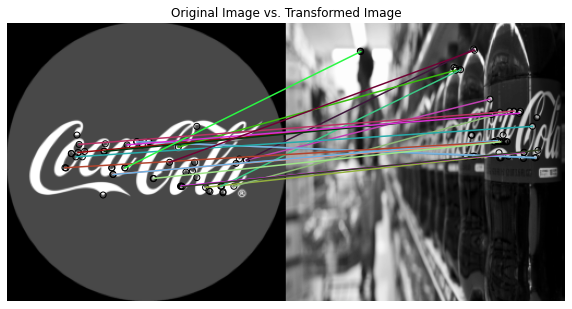

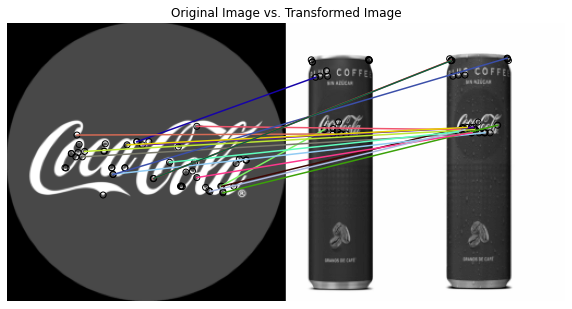

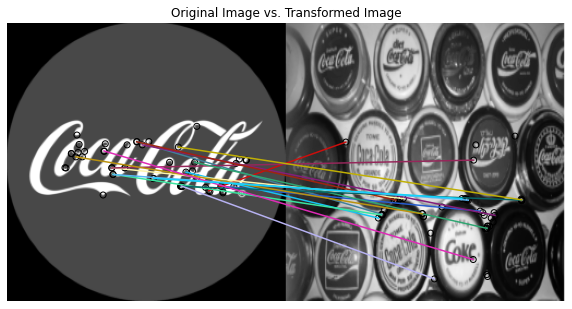

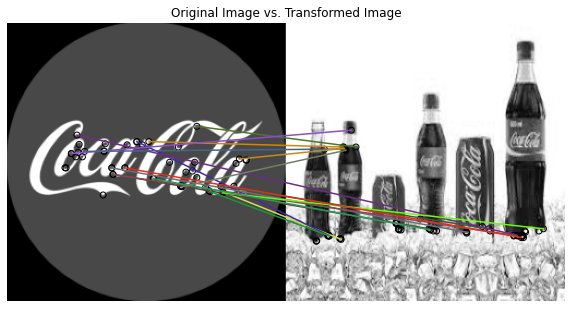

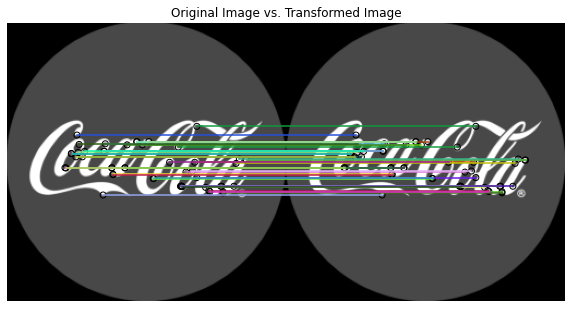

In [21]:
# solution
dataset_CocaCola = io.imread_collection('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab5Detection/images/cocacola/*')

model_CocaCola = dataset_CocaCola[6]

for i in range(len(dataset_CocaCola)):
  img2 = dataset_CocaCola[i]
  get_ORB(model_CocaCola,img2,50)
  i+=1

**Solution**

*In this case we use the same parameter for the cocacola dataset and the result was very similar. We can apreciated that in many corners with the same contrast the algorithm produced the match.*

...

### Exercise #6. Analysis of the applied techniques and results

*   What are the advantages of ORB object detection compared with HOG object detector?

**Solution**

*ORB uses a template based corner detector that is named FAST. In FAST corner detector, a decision tree is learned to determine the order of pixels in the circular template.
 Using a decision tree to determine a point as a corner accelerates the processing time.
The advantages of orb over HOG is

 1)the Results of comparing the images with varying intensity, orb is faster than HOG 
2)Results of comparing the image with its rotated image,in case of hog it is not scale and rotation invariant.
3)ORB is relatively immune to Gaussian image noise*

...

*   What would happen if you analyse an image that does not contain the Starbucks logo (as is the case of "edificio.jpg")?

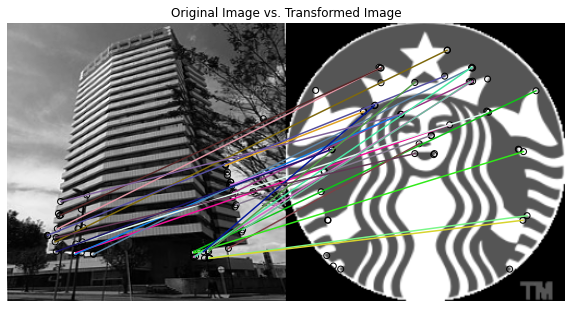

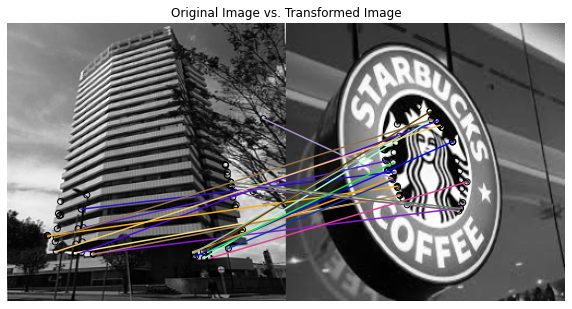

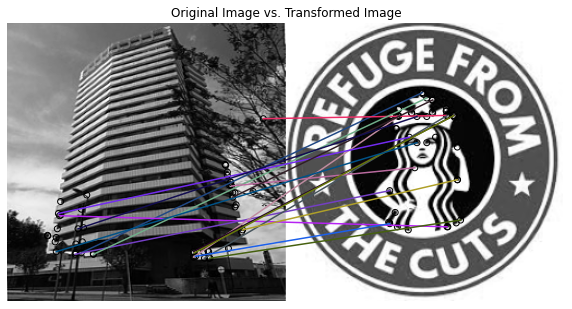

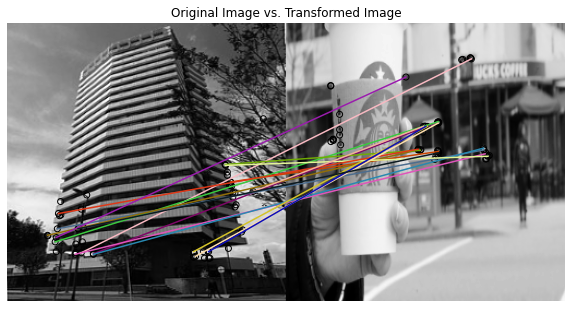

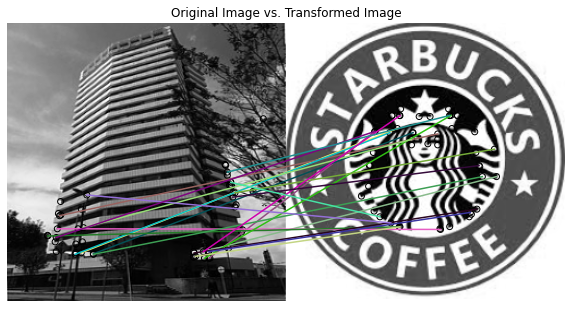

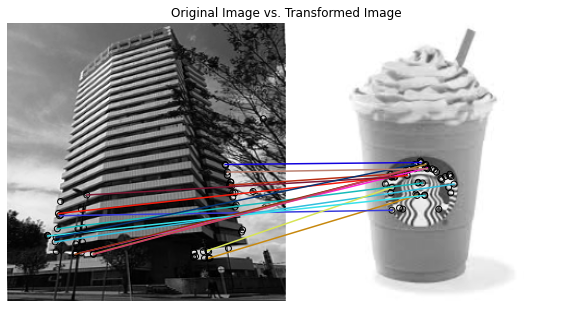

In [22]:
# solution
edificio = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab5Detection/images/edificio.jpg')

for i in range(len(starbucks_dataset)):
  img2 = starbucks_dataset[i]
  get_ORB(edificio,img2,50)
  i+=1

**Solution**

*When we applied the algorithm with a edificio how model and compare with starbucks dataset, we can percibe that in the majority of the cases always doing the matches in the same zone in the edificio images, with that we can consider that zones in the edificio have similarities with the corners in the starbucks images.*

...

*   What are the different ways of defining a quality measure for the correspondance between two images? (implementation of measures is not necessary)?

**Solution**

*(Double-click or enter to edit)*

...

# Panorama Stitching (Not graded)

Image Mosaicing is a technique of combining multiple overlapping images into a single image.

*   A simple tutorial can be found in this notebook: 
*   https://github.com/scikit-image/skimage-tutorials/blob/main/lectures/solutions/adv3_panorama-stitching-solution.ipynb


---

## **End of P2_2: Corner Detection and ORB**
Deadline for P2_2 submission in CampusVirtual is: **Monday, the 8th of November, 2021**
